<a href="https://colab.research.google.com/github/mcnica89/MATH4060/blob/main/Week5A_Gamblers_Problem_Optimal_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def plot_value_function_and_actions(v_star, a_star):
  #Purpose:
  #  Plot v_star and a_star for the Gambler's problem
  #Output:
  #  A plot of the simple random walks 


  fig, ax = plt.subplots()  # Create a figure containing a single axes.
  ax.axhline(0,color='black',linestyle='dashed')
  ax.axhline(1,color='black',linestyle='dashed')
  ax.set_title("Value function")
  ax.set_xlabel("State ($)")
  ax.set_ylabel("Value (Probability to win)")

  #ax.set(ylim=(-2*math.sqrt(N_steps),2*math.sqrt(N_steps)))

  #print("Generating random walks....")
  #random_walks = generate_simple_random_walk(random_key,N_steps,N_samples)
  #print("Plotting random walks....")
  ax.plot(v_star,linewidth=2, alpha=0.75, color='blue')  # Plot some data on the axes.
  
  fig2, ax2 = plt.subplots()  # Create a figure containing a single axes.
  ax2.set_title("Optimal bet")
  ax2.set_xlabel("State ($)")
  ax2.set_ylabel("Size of the optimal bet")


  ax2.plot(a_star,linewidth=2, alpha=0.75, color='red')  # Plot some data on the axes.

  plt.show()
  

In [86]:
def gamblers_problem_matrix(p_heads,N_target):
  '''return a matrix for what happesn int the gamblers problems'''
  P = np.zeros((N_target+1,N_target+1,N_target+1))
  #P(i,j,a) is the probabilty to go from state i to state j when you bet a
  i,j,a = np.indices(P.shape)
  first_row = (i==0)
  last_row = (i==N_target)
  first_or_last_row = np.logical_or(first_row,last_row)
  inbetween_row = np.logical_not(first_or_last_row)
  maximum_bet_size_ok = np.logical_and(a<=i, a<=N_target-i)
  allowed_to_bet = np.logical_and(inbetween_row, maximum_bet_size_ok)
  P[np.logical_and(i+a==j, allowed_to_bet)] = p_heads 
  P[np.logical_and(i-a==j, allowed_to_bet)] = 1-p_heads
  P[np.logical_and(i==j,np.logical_not(allowed_to_bet))] = 1
  return P

In [89]:
P = gamblers_problem_matrix(0.4,6)

In [91]:
print(P[:,:,3])

[[1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.  0.4]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  1. ]]


In [102]:
def gamblers_problem(p_heads, N_target, num_iters=10, loops=False):
  '''Given the gamblers problem, find the optimal value function v_star 
     and the optimal action a_star at any given state s'''

  v_star = np.zeros(N_target+1) #An array with the optimal values
  v_star[N_target] = 1 #Initialize known values at s=N_target and s=0
  v_star[0] = 0 

  a_star = np.zeros(N_target+1) #An array with the optimal betting size
  #The s-th component represent the value at s

  q_star = np.zeros((N_target+1,N_target+1))
  #q_star(s,a) is the value function if you play action a from state s
  # and then play optimally afterwards
  # The s-th, a-th etnry of q_star represents q_star(s,a)
  # Be careful! q_star(s,a) only makes sense if a is less than max_bet at s
  # Max_bet(s) = min(s,N_target-s)

  P = gamblers_problem_matrix(p_heads,N_target)

  for iteration in range(num_iters):
    if iteration % 100 == 0:
      print("Iteration number: ", iteration)
    
    if not loops:
      q_star = np.einsum( 'sja,j->sa' ,P,v_star)
      v_star = np.max(q_star,axis=1)
      a_star = np.argmax(q_star,axis=1)
    else:
    #Loop way:
    #plot_value_function_and_actions(v_star,a_star)
      for s in range(0,N_target): #Loop through all states
        max_bet = np.minimum(s, N_target-s )
        for a in range(1,max_bet+1): #Loop through all allowed actions
          q_star[s,a] = p_heads*v_star[s+a] + (1-p_heads)*v_star[s-a]
          v_star[s] = np.max(q_star[s,:])
          a_star[s] = np.argmax(q_star[s,:])

  plot_value_function_and_actions(v_star,a_star)
  return v_star, a_star

Iteration number:  0
Iteration number:  100
Iteration number:  200
Iteration number:  300
Iteration number:  400
Iteration number:  500
Iteration number:  600
Iteration number:  700
Iteration number:  800
Iteration number:  900


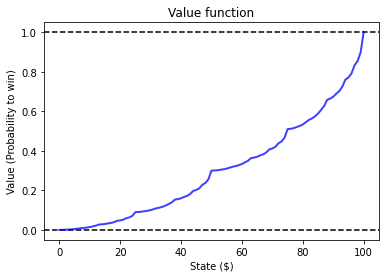

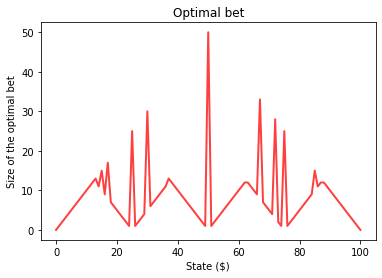

CPU times: user 1.36 s, sys: 12.1 ms, total: 1.38 s
Wall time: 1.62 s


(array([0.00000000e+00, 2.66917018e-04, 8.89723393e-04, 1.92325355e-03,
        2.96574464e-03, 4.32158176e-03, 6.41084517e-03, 8.50388325e-03,
        9.88581548e-03, 1.18309578e-02, 1.44052725e-02, 1.77664658e-02,
        2.13694839e-02, 2.71868419e-02, 2.83462775e-02, 3.00251072e-02,
        3.29527183e-02, 3.52816705e-02, 3.94365260e-02, 4.60307893e-02,
        4.80175751e-02, 5.16971693e-02, 5.92215525e-02, 6.31880185e-02,
        7.12316130e-02, 9.00000000e-02, 9.06228064e-02, 9.20760213e-02,
        9.44875916e-02, 9.69200708e-02, 1.00083691e-01, 1.04958639e-01,
        1.09842394e-01, 1.13066903e-01, 1.17605568e-01, 1.23612303e-01,
        1.31455087e-01, 1.39862129e-01, 1.53435964e-01, 1.56141314e-01,
        1.60058584e-01, 1.66889676e-01, 1.72323898e-01, 1.82018561e-01,
        1.97405175e-01, 2.02041008e-01, 2.10626728e-01, 2.28183623e-01,
        2.37438710e-01, 2.56207097e-01, 3.00000000e-01, 3.00622806e-01,
        3.02076021e-01, 3.04487592e-01, 3.06920071e-01, 3.100836

In [105]:
%time gamblers_problem(0.3, 100, 1000, False)